# Theano Basics


In [35]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt


### Basic Theano data types and matrix multiplication example

In [60]:
import theano.tensor as T
import theano

#  Different types of variables
s = T.scalar('c')
v = T.vector('v')
A = T.matrix('A')
# 3 and 4 dimentional tensors
T3 = T.tensor3('T3')
T3 = T.tensor4('T4')


### Addition of two matrix in Theano

In [61]:
a = T.matrix('a')
b = T.matrix('b')
# Equation to compute sum
c = a + b
# Define the function which will compute the equation and assign outputs
add_fn = theano.function(inputs = [a, b], outputs = [c])
# Execute the equation. You need to pass actual values of a and b to subtitute in the equation.
output = add_fn([[1, 2, 3, 4]], [[5, 6, 7, 8]])

print("\t", [[1, 2, 3, 4]], "\n+\t",[[5, 6, 7, 8]])
print("=", output)


	 [[1, 2, 3, 4]] 
+	 [[5, 6, 7, 8]]
= [array([[ 6.,  8., 10., 12.]])]


### Increment each element of a matrix

In [62]:
a = T.matrix('a')
# Create shared variable, the first argument is it's initial value, the second is name
one = theano.shared( np.array([[1, 1, 1, 1]]), "one")
incr = a + one
# Here we do not need to pass 'one' to function as it is shared variable.
fncr_fn = theano.function(inputs = [a], outputs = [incr])

output = fncr_fn([[1, 2, 3, 4]])
print(output)

output = fncr_fn([[5, 5, 5, 5]])
print(output)

[array([[2., 3., 4., 5.]])]
[array([[6., 6., 6., 6.]])]


### Matrix multiplication

In [63]:
# we can define a matrix multiplication
w = A.dot(v)

# how do these variables actually take on values?

matrix_times_vector = theano.function(inputs=[A, v], outputs=w)

# let's import numpy so we can create real arrays
A_val = np.array([[1,2], [3,4]])
v_val = np.array([5,6])

w_val = matrix_times_vector(A_val, v_val)

print("A=\n", A_val)
print("v=\n", v_val)
print("A . v =", w_val)


A=
 [[1 2]
 [3 4]]
v=
 [5 6]
A . v = [17. 39.]


### Accumulation

In [65]:
a = T.matrix('a')
# Create shared variable, initialize with zeros, the name is 'accum'
acc = theano.shared( np.array([[0., 0., 0., 0.]]), "accum")
# Define accumulation- add together and update acc with add in theano function. 
add = acc + a

# Here we do not need to pass 'acc' to function as it is shared variable.
acc_fn = theano.function(inputs = [a], outputs = [add], updates=[(acc, add)])
output = acc_fn([[1, 2, 3, 4]])
output = acc_fn([[1, 2, 3, 4]])
output = acc_fn([[1, 2, 3, 4]])

print(output)

[array([[ 3.,  6.,  9., 12.]])]


### Implementing gradient descent with Theano

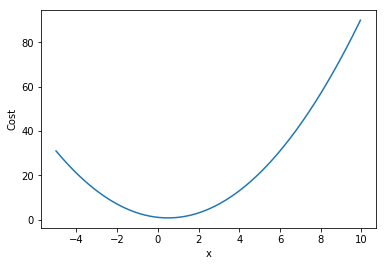

Iteration 0 	cost = 91.0
Iteration 1 	cost = 15.189999999999998
Iteration 2 	cost = 3.0604
Iteration 3 	cost = 1.1196640000000002
Iteration 4 	cost = 0.80914624
Iteration 5 	cost = 0.7594633983999999
Iteration 6 	cost = 0.751514143744
Iteration 7 	cost = 0.7502422629990401
Iteration 8 	cost = 0.7500387620798464
Iteration 9 	cost = 0.7500062019327755
Iteration 10 	cost = 0.7500009923092441
Iteration 11 	cost = 0.750000158769479
Iteration 12 	cost = 0.7500000254031167
Iteration 13 	cost = 0.7500000040644986
Iteration 14 	cost = 0.7500000006503199
Iteration 15 	cost = 0.7500000001040511
Iteration 16 	cost = 0.7500000000166482
Iteration 17 	cost = 0.7500000000026636
Iteration 18 	cost = 0.7500000000004261
Iteration 19 	cost = 0.7500000000000682

Value of x to minimize the cost function = 0.5000001044536047


In [66]:
# Let's create a shared variable so we can do gradient descent
# This adds another layer of complexity to the theano function
# Here, the first argument is shared variable's initial value, the second is it's name
x = theano.shared(10.0, 'x')

# A cost function that has a minimum value
cost = x*x - x + 1
# Plot the cost function
xvals = np.arange(-5, 10, 0.05) # Grid of 0.05 spacing from -5 to 10
yvals = xvals*xvals - xvals + 1 # Evaluate function on xvals
plt.plot(xvals, yvals) # Create line plot with yvals against xvals
plt.xlabel("x")
plt.ylabel("Cost")
plt.show() # Show the figure

# In theano, you don't have to compute gradients yourself, theano does it for you.
x_update = x - 0.3*T.grad(cost, x)

# x is not an "input", it's a thing you update
# in later examples, data and labels would go into the inputs
# and model params would go in the updates
# updates takes in a list of tuples, each tuple has 2 things in it:
# 1) the shared variable to update, 2) the update expression
train = theano.function(inputs=[], outputs=cost, updates=[(x, x_update)])

# Write your own loop to call the training function.
# It has no arguments!
for i in range(20):
    cost_val = train()
    print("Iteration", i, "\tcost =", cost_val)

# Print the optimal value of x
print("\nValue of x to minimize the cost function =", x.get_value())
